# Análisis de Tendencias de YouTube en Canadá
# 
# Limpieza Y Preparacion Dataset


In [ ]:
# Instalar librerias
!pip install pandas numpy seaborn


In [1]:
import pandas as pd
import json
import seaborn as sns

# Carga e inspección de datos

In [8]:
# Cargar datos de videos ORIGINAL
data = pd.read_csv('../data/CAvideos_cc50_202101.csv', encoding='utf-8')

# Cargar categorías desde JSON
with open('../data/CA_category_id.json', 'r') as f:
    categories = json.load(f)

# Procesar categorías
categories_data = pd.DataFrame(categories['items'])
categories_data['category_id'] = categories_data['id'].astype(int)
categories_data['title'] = categories_data['snippet'].apply(lambda x: x['title'])
categories_data['assignable'] = categories_data['snippet'].apply(lambda x: x['assignable'])

# Seleccionar solo columnas relevantes
categories_data = categories_data[['category_id', 'title', 'assignable']]

# Mostrar primeras filas de cada dataset
print("Datos de videos (primeros 6):")
display(data.head())
print("\nCategorías de videos (Todas):")
display(categories_data.head(32))
    

Datos de videos (primeros 6):


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)



Categorías de videos (Todas):


,category_id,title,assignable
0,1,Film & Animation,True
1,2,Autos & Vehicles,True
2,10,Music,True
3,15,Pets & Animals,True
4,17,Sports,True
5,18,Short Movies,False
6,19,Travel & Events,True
7,20,Gaming,True
8,21,Videoblogging,False
9,22,People & Blogs,True


# Verificación de tipos de datos

In [9]:
# Información básica del dataset
print("Información del dataset:")
data.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(data.describe().round(4))

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40881 non-null  object 
 1   trending_date           40881 non-null  object 
 2   title                   40881 non-null  object 
 3   channel_title           40881 non-null  object 
 4   category_id             40881 non-null  int64  
 5   publish_time            40881 non-null  object 
 6   tags                    40881 non-null  object 
 7   views                   40881 non-null  int64  
 8   likes                   40881 non-null  int64  
 9   dislikes                40881 non-null  int64  
 10  comment_count           40881 non-null  int64  
 11  thumbnail_link          40881 non-null  object 
 12  comments_disabled       40881 non-null  bool   
 13  ratings_disabled        40881 non-null  bool   
 14  video_error_o

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40881.0000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881.0000,40881.0000
mean,20.7956,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03,52.0259,-88.8177
std,6.7751,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04,7.2131,25.1195
min,1.0000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,44.5666,-139.0000
25%,20.0000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02,46.2493,-110.7333
50%,24.0000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03,49.8226,-81.2361
75%,24.0000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03,53.0167,-64.3480
max,43.0000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,68.7675,-57.4269


# Identificación de valores nulos o faltantes


Valores nulos por columna:


video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
state                        0
lon                          0
lat                          0
geometry                     0
description               1296
dtype: int64

<Axes: >

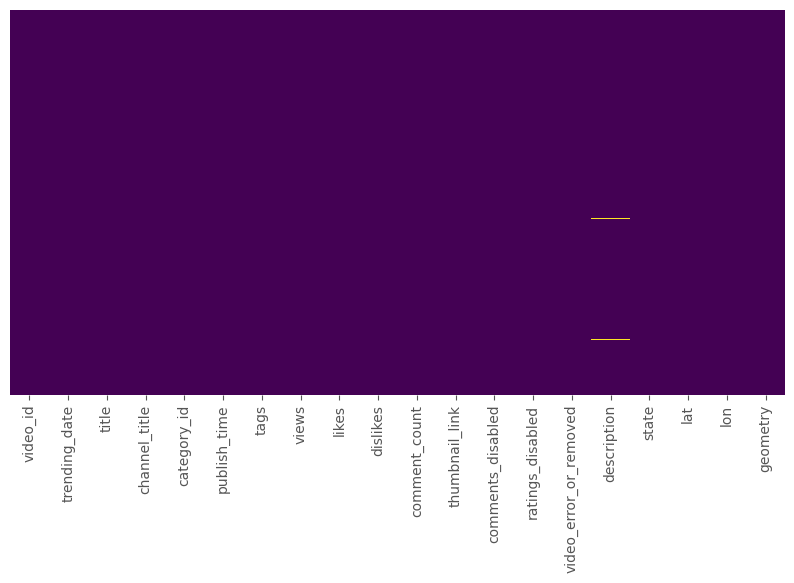

In [96]:
# Verificar valores nulos
print("\nValores nulos por columna:")
display(data.isna().sum().sort_values())

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Limpieza y organización de datos

In [ ]:
# Cargar CSV 
df = pd.read_csv('CAvideos_cc50_202101.csv', encoding='utf-8')

# Cargar categorias desde JSON
with open('CA_category_id.json') as f:
    categories_json = json.load(f)
     
# Crear diccionario completo (sin filtrar por 'assignable')
category_dict = {int(item['id']): item['snippet']['title'] for item in categories_json['items']}
df['category'] = df['category_id'].map(category_dict)
df['category'] = df['category'].fillna('[No Category]') # Si no exite categoria, asignar No Category

# Crear set de categorias asignables desde el JSON
assignable_ids = {int(item['id']) for item in categories_json['items'] if item['snippet']['assignable']}

# Marcar en nueva columna TRUE si es asignable, FALSE si no
df['assignable_category'] = df['category_id'].apply(lambda x: x in assignable_ids)
df[df['assignable_category'] == True]

# Eliminar "=" anted del video_id (evita #NAME? en excel)   
df['video_id'] = df['video_id'].astype(str).str.lstrip('=')

# Convertir fechas a datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Variables derivadas
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)
df['like_dislike_ratio'] = df['like_dislike_ratio'].astype(float).round(4) # Ratio de Like/Dislike
df['views_comments_ratio'] = df['views'] / (df['comment_count'] + 1)
df['views_comments_ratio'] = df['views_comments_ratio'].astype(float).round(4) #Ratio de vistas/comentarios

# Asegurar que ambas fechas esten sin zona horaria 
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce').dt.tz_localize(None)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Calcular dias entre publicación y trending date
df['days_to_trending'] = (df['trending_date'].dt.date - df['publish_time'].dt.date).apply(lambda x: x.days)

# Valores faltantes
df['description'] = df['description'].fillna('[No Description]') #Cambiar descripciones vacias por no descritpion
df['tags'] = df['tags'].fillna('[No Tags]') #Cambiar Tags vacios por no Tags
df['tags'] = df['tags'].apply(lambda x: '[No Tags]' if str(x).strip().lower() == '[none]' else x)

# Cambiamos los tags de [TAG|"TAG2"|"TAG3"] -> [TAG1,TAG2,TAG3]
def normalize_tags(tag_string):
    if pd.isna(tag_string) or str(tag_string).strip().lower() in ['[none]', 'nan']:
        return '[No Tags]'
    
    # Separar por |, eliminar comillas y espacios innecesarios
    tags = [tag.strip().strip('"') for tag in tag_string.split('|') if tag.strip().strip('"')]
    
    if not tags:
        return '[No Tags]'
    
    return ','.join(tags)

df['tags'] = df['tags'].apply(normalize_tags)
    
# Borramos category_id ya que asimilamos el JSON de categorias
df.drop(columns=['category_id'], inplace=True)


# Nuevo Dataset LIMPIO

In [48]:
# Guardar EXCEL en utf-8 para que se vean los caracteres de otros idiomas
df.to_csv('CAvideos_clean_excel.csv', index=False, encoding='utf-8-sig')